In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os

In [3]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Pallawa/*')
daftar_huruf_nama = [_+"/"+_.split('/')[-1]+".png" for _ in daftar_huruf]
daftar_huruf_kosong = []

for nama in daftar_huruf_nama:
  _ = cv2.imread(nama)
  print(nama.split('/')[-1], np.sum(255-_))

  if np.sum(255-_)==0:
    daftar_huruf_kosong.append(nama.split('/')[-1].split('.')[0])

PALLAVA_LETTER_AU.png 671244
PALLAVA_LETTER_AI.png 727893
PALLAVA_AI_LENGTH_MARK.png 180738
PALLAVA_LETTER_BA.png 373311
PALLAVA_LETTER_A.png 668037
PALLAVA_DOUBLE_DANDA.png 870075
PALLAVA_DANDA.png 355281
PALLAVA_LETTER_BHA.png 303057
PALLAVA_LETTER_AA.png 698220
PALLAVA_AU_LENGTH_MARK.png 209679
PALLAVA_LETTER_HA.png 478692
PALLAVA_LETTER_CHA.png 342321
PALLAVA_LETTER_CA.png 353775
PALLAVA_LETTER_DDHA.png 333663
PALLAVA_LETTER_DA.png 257919
PALLAVA_LETTER_GA.png 327588
PALLAVA_LETTER_GHA.png 504093
PALLAVA_LETTER_DDA.png 286437
PALLAVA_LETTER_EE.png 750105
PALLAVA_LETTER_DHA.png 392280
PALLAVA_LETTER_MA.png 469332
PALLAVA_LETTER_LLA.png 381966
PALLAVA_LETTER_KA.png 445083
PALLAVA_LETTER_I.png 590580
PALLAVA_LETTER_JA.png 415449
PALLAVA_LETTER_LA.png 651189
PALLAVA_LETTER_LLLA.png 599202
PALLAVA_LETTER_II.png 493353
PALLAVA_LETTER_JHA.png 370827
PALLAVA_LETTER_KHA.png 395124
PALLAVA_LETTER_NGA.png 353979
PALLAVA_LETTER_NA.png 268035
PALLAVA_LETTER_PA.png 358902
PALLAVA_LETTER_NYA.png 

In [4]:
def autoCrop(this_image):
    image_data_bw = this_image.max(axis=2)
    non_empty_columns = np.where(image_data_bw.min(axis=0)<0.2)[0]
    non_empty_rows = np.where(image_data_bw.min(axis=1)<0.2)[0]
    cropBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))

    image_data_new = this_image[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1 , :]
    
    return image_data_new

In [5]:
daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Pallawa/*')
daftar_huruf_nama = [_+"/"+_.split('/')[-1]+".png" for _ in daftar_huruf]
daftar_huruf_kosong = []

for nama in daftar_huruf_nama:
  _ = cv2.imread(nama)
  print(nama.split('/')[-1], np.sum(255-_))
  _ = autoCrop(_)
  cv2.imwrite(nama, _)

PALLAVA_LETTER_AU.png 671244
PALLAVA_LETTER_AI.png 727893
PALLAVA_AI_LENGTH_MARK.png 180738
PALLAVA_LETTER_BA.png 373311
PALLAVA_LETTER_A.png 668037
PALLAVA_DOUBLE_DANDA.png 870075
PALLAVA_DANDA.png 355281
PALLAVA_LETTER_BHA.png 303057
PALLAVA_LETTER_AA.png 698220
PALLAVA_AU_LENGTH_MARK.png 209679
PALLAVA_LETTER_HA.png 478692
PALLAVA_LETTER_CHA.png 342321
PALLAVA_LETTER_CA.png 353775
PALLAVA_LETTER_DDHA.png 333663
PALLAVA_LETTER_DA.png 257919
PALLAVA_LETTER_GA.png 327588
PALLAVA_LETTER_GHA.png 504093
PALLAVA_LETTER_DDA.png 286437
PALLAVA_LETTER_EE.png 750105
PALLAVA_LETTER_DHA.png 392280
PALLAVA_LETTER_MA.png 469332
PALLAVA_LETTER_LLA.png 381966
PALLAVA_LETTER_KA.png 445083
PALLAVA_LETTER_I.png 590580
PALLAVA_LETTER_JA.png 415449
PALLAVA_LETTER_LA.png 651189
PALLAVA_LETTER_LLLA.png 599202
PALLAVA_LETTER_II.png 493353
PALLAVA_LETTER_JHA.png 370827
PALLAVA_LETTER_KHA.png 395124
PALLAVA_LETTER_NGA.png 353979
PALLAVA_LETTER_NA.png 268035
PALLAVA_LETTER_PA.png 358902
PALLAVA_LETTER_NYA.png 

In [6]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import Augmentor

def perbanyak(ini, sebanyak_ini):
  p = Augmentor.Pipeline(source_directory=ini, output_directory='.')
  p.random_distortion(probability=1, grid_width=2, grid_height=2, magnitude=1)
  p.rotate(probability=0.7, max_left_rotation=6, max_right_rotation=6)
  p.zoom_random(probability=0.7, percentage_area=0.9)
  p.resize(probability=1, width=64, height=64)
  p.sample(sebanyak_ini)

In [8]:
pallawa = glob.glob("/content/drive/MyDrive/AKSARA/Pallawa/*")

for huruf in pallawa:
  perbanyak(huruf, 20)

Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_AU/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DF1C9BB0>: 100%|██████████| 20/20 [00:00<00:00, 40.72 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_AI/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DF28B970>: 100%|██████████| 20/20 [00:00<00:00, 70.16 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_AI_LENGTH_MARK/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DF1C9F10>: 100%|██████████| 20/20 [00:00<00:00, 51.77 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_BA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DF1DDD90>: 100%|██████████| 20/20 [00:00<00:00, 54.10 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_A/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DF1E7490>: 100%|██████████| 20/20 [00:00<00:00, 56.48 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_DOUBLE_DANDA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DF1BDBB0>: 100%|██████████| 20/20 [00:00<00:00, 55.71 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_DANDA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DF1DDC40>: 100%|██████████| 20/20 [00:00<00:00, 55.34 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_BHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DF1BDBB0>: 100%|██████████| 20/20 [00:00<00:00, 51.46 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_AA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DF1E74C0>: 100%|██████████| 20/20 [00:00<00:00, 50.97 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_AU_LENGTH_MARK/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DF28E940>: 100%|██████████| 20/20 [00:00<00:00, 49.06 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_HA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DFE581F0>: 100%|██████████| 20/20 [00:00<00:00, 49.31 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_CHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DF1C9F10>: 100%|██████████| 20/20 [00:00<00:00, 64.61 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_CA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC978A60>: 100%|██████████| 20/20 [00:00<00:00, 73.51 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_DDHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DFE581F0>: 100%|██████████| 20/20 [00:00<00:00, 66.13 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_DA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC980520>: 100%|██████████| 20/20 [00:00<00:00, 65.99 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_GA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC979DF0>: 100%|██████████| 20/20 [00:00<00:00, 77.59 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_GHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC978490>: 100%|██████████| 20/20 [00:00<00:00, 68.74 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_DDA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC979430>: 100%|██████████| 20/20 [00:00<00:00, 54.15 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_EE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC97EE20>: 100%|██████████| 20/20 [00:00<00:00, 73.82 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_DHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC979610>: 100%|██████████| 20/20 [00:00<00:00, 70.59 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_MA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC98E9A0>: 100%|██████████| 20/20 [00:00<00:00, 65.44 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_LLA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC992EB0>: 100%|██████████| 20/20 [00:00<00:00, 48.64 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_KA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DF1EDA60>: 100%|██████████| 20/20 [00:00<00:00, 49.54 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_I/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC979130>: 100%|██████████| 20/20 [00:00<00:00, 40.97 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_JA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC992DF0>: 100%|██████████| 20/20 [00:00<00:00, 46.87 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_LA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DF1E7730>: 100%|██████████| 20/20 [00:00<00:00, 24.45 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_LLLA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC980220>: 100%|██████████| 20/20 [00:00<00:00, 61.61 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_II/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC99D430>: 100%|██████████| 20/20 [00:00<00:00, 65.20 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_JHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC980520>: 100%|██████████| 20/20 [00:00<00:00, 57.39 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_KHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC92EEE0>: 100%|██████████| 20/20 [00:00<00:00, 41.01 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_NGA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC99F7C0>: 100%|██████████| 20/20 [00:00<00:00, 47.98 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_NA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC9348B0>: 100%|██████████| 20/20 [00:00<00:00, 46.88 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_PA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC932F70>: 100%|██████████| 20/20 [00:00<00:00, 53.70 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_NYA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC93A5B0>: 100%|██████████| 20/20 [00:00<00:00, 45.73 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_SA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC9324C0>: 100%|██████████| 20/20 [00:00<00:00, 50.21 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_PHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC9406A0>: 100%|██████████| 20/20 [00:00<00:00, 55.42 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_NNA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC947E20>: 100%|██████████| 20/20 [00:00<00:00, 49.18 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_SHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC946910>: 100%|██████████| 20/20 [00:00<00:00, 54.04 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_RA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC947BE0>: 100%|██████████| 20/20 [00:00<00:00, 46.60 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_OO/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC947A00>: 100%|██████████| 20/20 [00:00<00:00, 58.26 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_SIGN_ANUSVARA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC940AF0>: 100%|██████████| 20/20 [00:00<00:00, 40.20 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_YA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC93ADF0>: 100%|██████████| 20/20 [00:00<00:00, 55.27 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_TTHA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC947E20>: 100%|██████████| 20/20 [00:00<00:00, 49.53 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_VA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC944610>: 100%|██████████| 20/20 [00:00<00:00, 50.12 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_THA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC951460>: 100%|██████████| 20/20 [00:00<00:00, 59.99 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_TA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC92E910>: 100%|██████████| 20/20 [00:00<00:00, 60.62 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_U/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DF28BF70>: 100%|██████████| 20/20 [00:00<00:00, 49.17 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_SSA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC951AF0>: 100%|██████████| 20/20 [00:00<00:00, 67.26 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_LETTER_TTA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC960D60>: 100%|██████████| 20/20 [00:00<00:00, 46.71 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_SIGN_SIDDHAM/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC963A60>: 100%|██████████| 20/20 [00:00<00:00, 62.49 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_SIGN_VIRAMA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC960D60>: 100%|██████████| 20/20 [00:00<00:00, 78.91 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_VOWEL_SIGN_AA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC9600D0>: 100%|██████████| 20/20 [00:00<00:00, 56.10 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_SIGN_VISARGA/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC8F1D30>: 100%|██████████| 20/20 [00:00<00:00, 77.27 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_VOWEL_SIGN_AU_LEFT/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC8EA040>: 100%|██████████| 20/20 [00:00<00:00, 76.19 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_VOWEL_SIGN_AI_RIGHT/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC8F5250>: 100%|██████████| 20/20 [00:00<00:00, 67.03 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_VOWEL_SIGN_EE/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC8FBC10>: 100%|██████████| 20/20 [00:00<00:00, 83.86 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_VOWEL_SIGN_I/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC8F5FD0>: 100%|██████████| 20/20 [00:00<00:00, 67.97 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_VOWEL_SIGN_AI_LEFT/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC963C40>: 100%|██████████| 20/20 [00:00<00:00, 83.42 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_SUBJOINER/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC8FB7C0>: 100%|██████████| 20/20 [00:00<00:00, 70.96 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_VOWEL_SIGN_AU_RIGHT/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC93AF40>: 100%|██████████| 20/20 [00:00<00:00, 76.91 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_VOWEL_SIGN_U/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC9600D0>: 100%|██████████| 20/20 [00:00<00:00, 68.41 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_VOWEL_SIGN_UU/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC8F1CA0>: 100%|██████████| 20/20 [00:00<00:00, 80.75 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_VOWEL_SIGN_OO_LEFT/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC8F1B80>: 100%|██████████| 20/20 [00:00<00:00, 79.82 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_VOWEL_SIGN_II/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32ECC31520>: 100%|██████████| 20/20 [00:00<00:00, 78.18 Samples/s]


Initialised with 1 image(s) found.
Output directory set to /content/drive/MyDrive/AKSARA/Pallawa/PALLAVA_VOWEL_SIGN_OO_RIGHT/..

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F32DC910460>: 100%|██████████| 20/20 [00:00<00:00, 74.03 Samples/s]


In [ ]:
'''import shutil

for i in daftar_huruf_kosong:
  shutil.rmtree('/content/drive/MyDrive/AKSARA/Sunda/' + i)''' 

In [9]:
x = []
y = []

daftar_huruf = glob.glob('/content/drive/MyDrive/AKSARA/Pallawa/*')

for c, jenis_huruf in enumerate(daftar_huruf):
  list_huruf = glob.glob(jenis_huruf + '/*')
  for huruf in list_huruf:
    try:
      aksara = cv2.imread(huruf)
      aksara = aksara/255
      #aksara = autoCrop(aksara)
      if aksara.shape[0] == 0 or aksara.shape[1] == 1:
        continue
      else:
        aksara = cv2.resize(aksara, (64, 64))
        x.append(aksara)
        y.append(c)
    except:
      continue

In [10]:
len(x)

1365

In [11]:
len(set(y))

65

In [12]:
1365/65

21.0

In [13]:
z = list(zip(x,y))
random.shuffle(z)
x, y = zip(*z)
x = np.asarray(x).astype(float)
y = np.asarray(y)

In [ ]:
y.shape

(2142,)

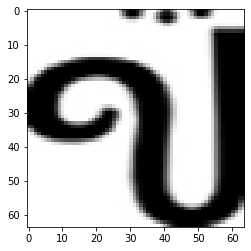

In [14]:
plt.imshow(x[200])

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import accuracy, categorical_accuracy

model = Sequential()

model.add(Conv2D(2, (3, 3), input_shape = x.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(4, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(16, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(units = 65, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x, y, batch_size = 2, epochs = 20, validation_split = 0.2)

Epoch 1/20
453/453 [==============================] - 4s 6ms/step - loss: 2.2596 - accuracy: 0.4503 - val_loss: 0.8635 - val_accuracy: 0.7885
Epoch 2/20
453/453 [==============================] - 3s 6ms/step - loss: 0.3865 - accuracy: 0.8885 - val_loss: 0.6821 - val_accuracy: 0.8414
Epoch 3/20
453/453 [==============================] - 3s 6ms/step - loss: 0.1885 - accuracy: 0.9294 - val_loss: 0.5674 - val_accuracy: 0.8678
Epoch 4/20
453/453 [==============================] - 2s 5ms/step - loss: 0.1300 - accuracy: 0.9503 - val_loss: 0.4971 - val_accuracy: 0.8899
Epoch 5/20
453/453 [==============================] - 3s 6ms/step - loss: 0.0680 - accuracy: 0.9757 - val_loss: 0.4442 - val_accuracy: 0.9163
Epoch 6/20
453/453 [==============================] - 3s 6ms/step - loss: 0.0616 - accuracy: 0.9757 - val_loss: 0.4582 - val_accuracy: 0.9075
Epoch 7/20
453/453 [==============================] - 3s 6ms/step - loss: 0.0498 - accuracy: 0.9812 - val_loss: 0.5133 - val_accuracy: 0.8943
Epoch 

In [16]:
print("->", 0)
history = model.fit(x, y, batch_size=2, epochs=2, validation_split=0.1)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

for i in range(1, 20):
  z = list(zip(x,y))
  random.shuffle(z)
  del x, y
  x, y = zip(*z)
  x = np.asarray(x).astype(float)
  y = np.asarray(y)
  del z

  print("->", i)
  history = model.fit(x, y, batch_size=2, epochs=2, validation_split=0.1)
  
  accuracy = np.concatenate((accuracy, history.history['accuracy']), axis=0)
  val_accuracy = np.concatenate((val_accuracy, history.history['val_accuracy']), axis=0)
  loss = np.concatenate((loss, history.history['loss']), axis=0)
  val_loss = np.concatenate((val_loss, history.history['val_loss']), axis=0)

-> 0
Epoch 1/2
614/614 [==============================] - 5s 8ms/step - loss: 1.9485 - accuracy: 0.5098 - val_loss: 0.6063 - val_accuracy: 0.8686
Epoch 2/2
614/614 [==============================] - 4s 7ms/step - loss: 0.3804 - accuracy: 0.8673 - val_loss: 0.4337 - val_accuracy: 0.8832
-> 1
Epoch 1/2
614/614 [==============================] - 4s 7ms/step - loss: 0.2670 - accuracy: 0.9178 - val_loss: 0.2301 - val_accuracy: 0.9051
Epoch 2/2
614/614 [==============================] - 4s 7ms/step - loss: 0.1874 - accuracy: 0.9332 - val_loss: 0.2657 - val_accuracy: 0.8905
-> 2
Epoch 1/2
614/614 [==============================] - 4s 7ms/step - loss: 0.1730 - accuracy: 0.9316 - val_loss: 0.1965 - val_accuracy: 0.9197
Epoch 2/2
614/614 [==============================] - 5s 7ms/step - loss: 0.1443 - accuracy: 0.9430 - val_loss: 0.1588 - val_accuracy: 0.9270
-> 3
Epoch 1/2
614/614 [==============================] - 5s 7ms/step - loss: 0.1352 - accuracy: 0.9544 - val_loss: 0.1215 - val_accuracy: 

In [21]:
model.save_weights("Model_Pallawa_FIX.h5")

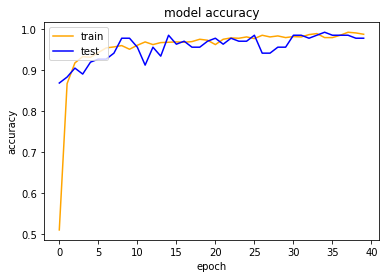

In [17]:
plt.plot(accuracy, 'orange', val_accuracy, 'blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

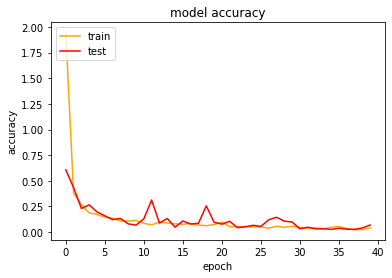

In [18]:
plt.plot(loss, 'orange', val_loss, 'red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(x[-1000:])
y_pred = np.argmax(y_pred, axis=1)

print(accuracy_score(y_pred, y[-1000:]))
cm = confusion_matrix(y_pred, y[-1000:])
print(cm)

print(classification_report(y_pred, y[-1000:]))

32/32 [==============================] - 2s 51ms/step
0.98
[[15  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0 15  0]
 [ 0  0  0 ...  0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        18
          10       1.00      1.00      1.00        16
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        16
          13       1.00     

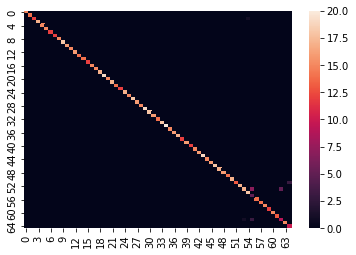

In [20]:
import seaborn as sns

sns.heatmap(cm)